### IT IS THE CLUSTTERING OF DATA POINTS BY MAKING GROUPS BASED ON THE SIMILARITIES OF THE DATA POINTS

### POINTS THAT ARE NEAREST TO CENTROID IS GOING TO GROUP OF THAT CENTROID AND ANOTHER FOR OTHER CENTROID BY DRAWING PERPENDICULAR

### AFTER CLCULATING THE MEAN OF EACH CLUSTER DATA OF EACH CENROID THEN WE SHIFT THE CENTROID TO THE MEAN POSITION OF EACH CLUSTER

### THEN AGAIN WE SEE IF DATA POINTS IS NEARER TO CENTROID AND MAKE THE CLUSTER AGAIN BY DRAWING PERPENDICULAR LINE

### AGAIN WE CALCULATE MEAN AND DISPLACE THE CENTROID

### WE DO IT AGAIN AND AGAIN UNTIL THERE IS NO DIFFERENT DATA POINT IN DIFFERENT CENTROID LINE

### AFTER GETTING THAT WE GET DIFFERENT CLUSTERS

### HOW TO KNOW K VALUE

### WCSS:WITHIN CLUSTER SUM OF SQUARES

### WCSS IS SQUARE OF SUM OF DISTANCE TO THE CENTROUD FROM ALL DATA POINTS

### WHEN K=1 IT IS SQUARE OF SUM OF ALL DATA POINTS TO THE CENTROID BUT WHEN K=2 IT WILL DIVIDE THE DATA POINTS WITH THEIR NEAREST DATA POINTS

### SO MORE K VALUE LESS WCSS 

#### AFTER CERTAIN K VALUE AFTER GRAPH WILL BE SAME WHICH IS ELBOW SO WE HAVE TO FIND THAT ELBOW

### EUCLIDIAN DISTANCE:DISTANCE FORMULA

### MANHATTAN DISTANCE:|X2-X1|+|Y2-Y1|

### RANDOM INITIALIZATION TRAP(K MEANS++):SYSTEM MAKES WRONG CLUSTER .IT MAKES RANDOM GROUPS WHERE SOME CLUSTER HAS LARGE DATA BUT SOME HAS SMALL

### k means technique: in this centroid are innitialized far from datapoints which will make sure to make equal size cluster

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import make_blobs#imporrting make_blobs dataset

In [4]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [5]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

In [6]:
X.shape

(1000, 2)

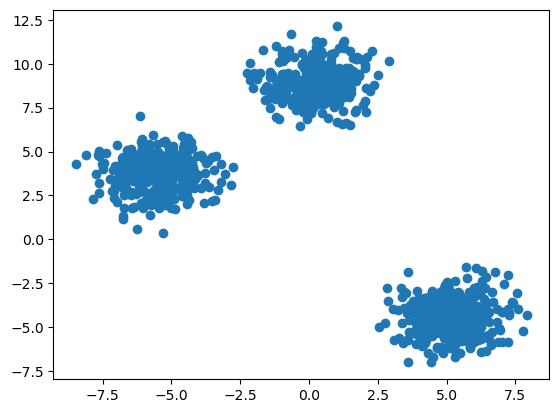

In [7]:
plt.scatter(X[:,0],X[:,1])#taking 1st and 2nd row to scatter

### MODEL TRAINING TESTIN

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

### TO KNOW THE K VALUE WE CAN DO WCSS MANUALLY

In [10]:
from sklearn.cluster import KMeans
wcss=[]#making a empty to get appended
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")#kmens++ makes sure to get equal or valid cluster by taking the centroid far from data points
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

In [11]:
wcss

[41020.341327294795,
 9578.351908737222,
 1578.2756658906949,
 1358.6010351144723,
 1174.8605686030107,
 1008.5753305750914,
 901.8223431152568,
 794.3466590306589,
 695.0864482049531,
 632.405469172012]

Text(0, 0.5, 'wcss')

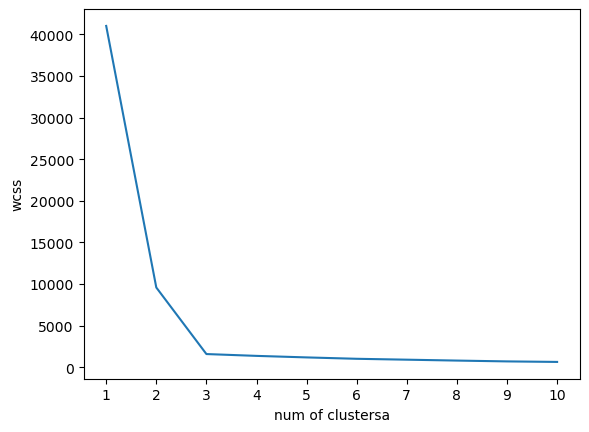

In [12]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("num of clustersa")
plt.ylabel("wcss")

In [13]:
kmeans=KMeans(n_clusters=3,init="k-means++")#to make sure to use both k means++ and specify number of clusters

In [14]:
y_labels=kmeans.fit_predict(X_train)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


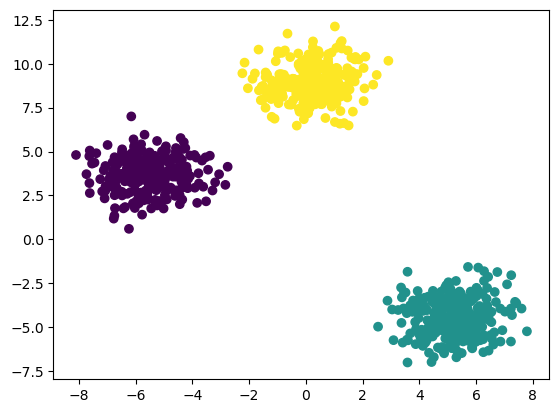

In [15]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)#It gives the clusters with different colors due to y labels

In [16]:
y_test=kmeans.predict(X_test)#we dont use fit on test data

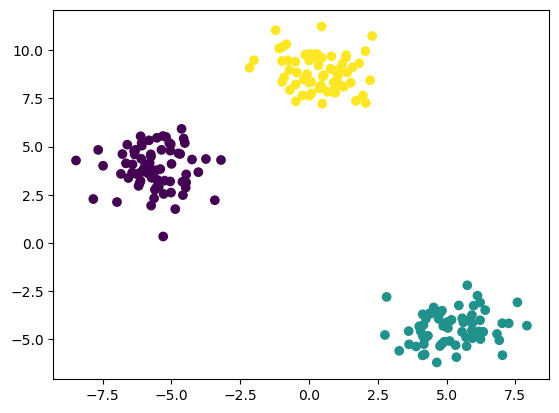

In [17]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)#w

### TO USE AUTOMATIC WAY TO KNOW K VALUE

In [18]:
pip install kneed

In [21]:
from kneed import KneeLocator

In [23]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')#when values are decreasing on graph use both convex and decreasing

In [25]:
kl.elbow#it gives the value of k

3

## PERFORMACE VALIDATION SILHOUETTE SCORE

In [26]:
from sklearn.metrics import silhouette_score

In [32]:
from sklearn.cluster import KMeans
sc=[]#making a empty to get appended
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")#kmens++ makes sure to get equal or valid cluster by taking the centroid far from data points
    kmeans.fit(X_train)   
    score=silhouette_score(X_train,kmeans.labels_)
    sc.append(score)


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

In [33]:
sc

[0.7247622088450708,
 0.8058493923867277,
 0.6373400618256782,
 0.4846056468566694,
 0.34136276227358375,
 0.3455748892474273,
 0.3499934797038112,
 0.3441862450877421,
 0.3379316968524169]

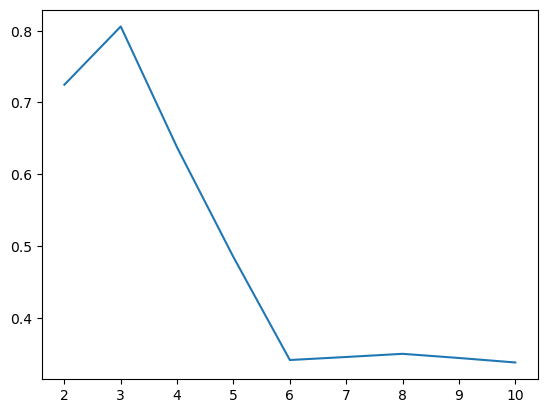

In [36]:
plt.plot(range(2,11),sc)#as the graph shows 3 has higher silhoutte coeff so its a k value needed